In [222]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# load the training dataset
data = pd.read_csv('train.csv')
features = ['Pclass','Sex','Age','SibSp','Parch','Embarked']
label = 'Survived'

enc = LabelEncoder()
data['Sex'] = enc.fit_transform(data['Sex'])
data = data.dropna(subset=['Age'])
data = data.dropna(subset=['Embarked'])
data['Embarked'] = enc.fit_transform(data['Embarked'])






In [223]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


In [224]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.752896
1,1,0.205298


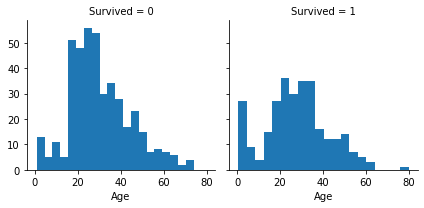

In [225]:
import seaborn as sns
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [226]:
X, y = data[features].values, data[label].values


from sklearn.preprocessing import Normalizer


#scaler = Normalizer().fit(X)
#X = scaler.transform(X)

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [227]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create training pipeline
pipeline = Pipeline(steps=[('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('regressor', LogisticRegression())])


Overall Accuracy: 0.780373831775701
Overall Precision: 0.7779977375565611
Overall Recall: 0.7650786516853932


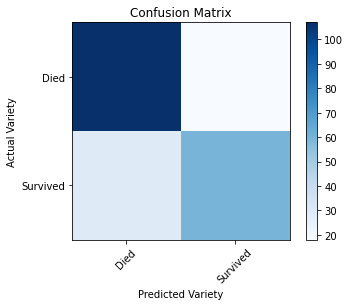

In [228]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = model.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Died','Survived']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [229]:
#LinSVC

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


pipeline2 =Pipeline(steps=[('linearsvc', LinearSVC(random_state=0))])
model2 = pipeline2.fit(X_train, y_train)

C:\Users\Tijs\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Overall Accuracy: 0.7850467289719626
Overall Precision: 0.7854196642685851
Overall Recall: 0.7674606741573033


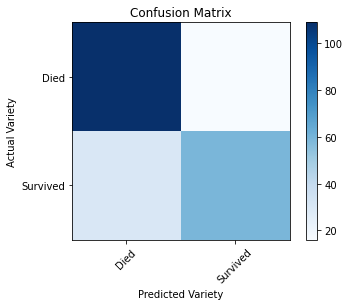

In [230]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = model2.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Died','Survived']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [231]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Overall Accuracy: 0.9252336448598131
Overall Precision: 0.923056179775281
Overall Recall: 0.923056179775281


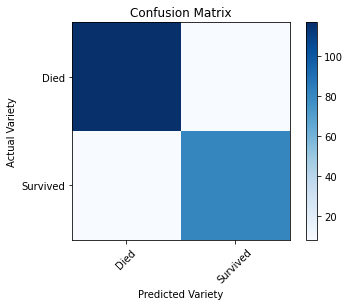

In [232]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = neigh.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Died','Survived']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [233]:
from sklearn.ensemble import RandomForestClassifier



forest = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=1)
forest.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=1)

Overall Accuracy: 0.9205607476635514
Overall Precision: 0.917741935483871
Overall Recall: 0.919056179775281


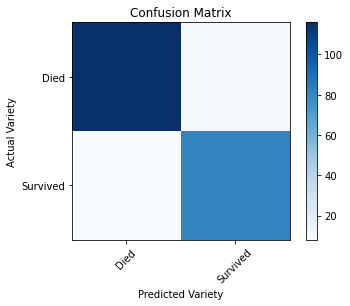

In [234]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = forest.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Died','Survived']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()